# WeatherPy Analysis

* By looking at the Temperature vs Latitude, we can see that the cities near the equator are warmer/hotter then those cities located away.
* We were NOT able to observe any relationship between: 1) Humidity vs Latitude, 2) Cloudiness vs Latitude and 3) Wind Speed vs Latitude.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# lists for holding all the important data from the API
lats = []
lngs = []
temperatures = []
max_temperatures = []
humidities = []
cloudiness = []
wind_data = []
city_ids = []
all_cities = []

for city in cities:
    query_url = url + "&q=" + city
    weather_json = requests.get(query_url).json()
    
    # Check if the key 'coord' is defined in the json
    if 'coord' in weather_json:
        lat = weather_json['coord']['lat']
        lng = weather_json['coord']['lon']
        temperature = weather_json['main']['temp']
        max_temperature = weather_json['main']['temp_max']
        humidity = weather_json['main']['humidity']
        clouds = weather_json['clouds']['all']
        wind = weather_json['wind']['speed']
        cityid = weather_json['id']
    
        lats.append(lat)
        lngs.append(lng)
        temperatures.append(temperature)
        max_temperatures.append(max_temperature)
        humidities.append(humidity)
        cloudiness.append(clouds)
        wind_data.append(wind)
        city_ids.append(cityid)
        all_cities.append(city)
        
weather_df = pd.DataFrame({
                            'City ID': city_ids,
                            'City Name': all_cities,
                            'Latitude': lats,
                            'Longitude': lngs,
                            'Temperature (F)': temperatures,
                            'Max Temperature (F)': max_temperatures,
                            'Humidity': humidities,
                            'Cloudiness': cloudiness,
                            'Wind Speed (MPH)': wind_data,
})

weather_df.head()

,City ID,City Name,Latitude,Longitude,Temperature (F),Max Temperature (F),Humidity,Cloudiness,Wind Speed (MPH)
0,5880568,bethel,60.79,-161.76,64.40,64.40,68,75,11.41
1,2012780,zabaykalsk,49.64,117.33,63.95,63.95,82,24,4.41
2,2267254,lagoa,37.14,-8.45,77.00,77.00,69,0,3.36
3,3576994,cockburn town,21.46,-71.14,81.14,81.14,100,68,21.30
4,6089245,norman wells,65.28,-126.83,64.40,64.40,72,90,6.93


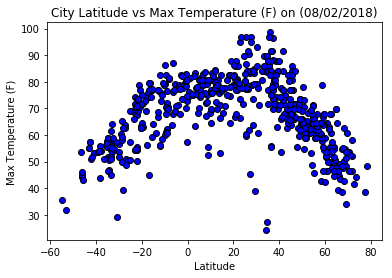

In [4]:
plt.scatter(weather_df['Latitude'], weather_df['Max Temperature (F)'], color='blue', edgecolors='black')
plt.title('City Latitude vs Max Temperature (F) on (08/02/2018)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('output_data/latitude-vs-max-temperature.png')

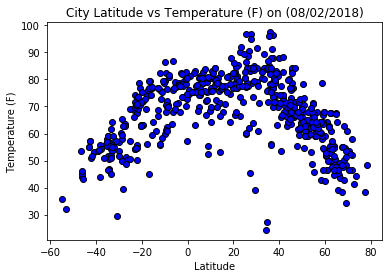

In [5]:
plt.scatter(weather_df['Latitude'], weather_df['Temperature (F)'], color='blue', edgecolors='black')
plt.title('City Latitude vs Temperature (F) on (08/02/2018)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('output_data/latitude-vs-temperature.png')

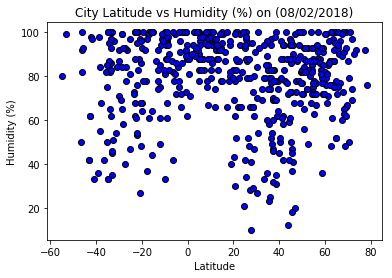

In [6]:
plt.scatter(weather_df['Latitude'], weather_df['Humidity'], color='blue', edgecolors='black')
plt.title('City Latitude vs Humidity (%) on (08/02/2018)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/latitude-vs-humidity.png')

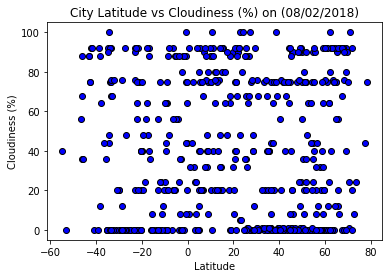

In [7]:
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'], color='blue', edgecolors='black')
plt.title('City Latitude vs Cloudiness (%) on (08/02/2018)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('output_data/latitude-vs-cloudiness.png')

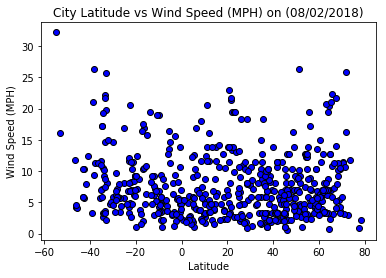

In [8]:
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed (MPH)'], color='blue', edgecolors='black')
plt.title('City Latitude vs Wind Speed (MPH) on (08/02/2018)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.savefig('output_data/latitude-vs-wind-speed.png')

In [9]:
# Save the dataframe to csv
weather_df.to_csv(output_data_file, index=False)